In [58]:
import math
import random
import pickle
import matplotlib.pyplot as plt
import numpy as np

from atp_hydrolysis_sim import atp_hydrolysis_sim
from convert_trajectory import convert_trajectory
from trajectory_avg import trajectory_avg

from engine_sim import engine_sim
from trajectory_avg import trajectory_avg
from time_over import time_over
from get_prob_distr import get_prob_distr

from t_distr import t_distr

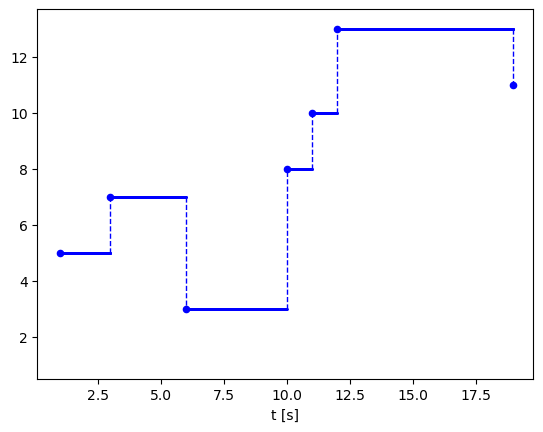

In [59]:
def avgfit(x):
    return 0.5*x+0.5
dt=0.01
x = np.linspace(1,19,int(18/dt))
y = avgfit(x)

x2 = np.linspace(1,18,int(17/dt))
y2 = avgfit(x2)

times1 = np.array([1, 3, 6, 10, 11, 12, 19])
dts1 = np.array([2, 3, 4, 1, 1, 8])
traj1 = np.array([5, 7, 3, 8, 10, 13, 11])

times2 = np.array([1, 2, 7, 11, 12, 15, 18])
dts2 = np.array([1, 5, 4, 1, 3, 3])
traj2 = np.array([5, 2, 1, 2, 3, 6, 4])

times3 = np.array([1, 4, 5, 9, 14, 16, 19])
dts3 = np.array([1, 3, 1, 4, 5, 2, 3])
traj3 = np.array([5, 2, 4, 7, 10, 9, 7])

t1convert, traj1convert = convert_trajectory(dt, times1, dts1, traj1)
t2convert, traj2convert = convert_trajectory(dt, times2, dts2, traj2)
t3convert, traj3convert = convert_trajectory(dt, times3, dts3, traj3)

for i in range(len(times1)-1):
    plt.plot(np.linspace(times1[i+1],times1[i+1],100),np.linspace(traj1[i],traj1[i+1],100),color='blue',linestyle='dashed',linewidth=1)
plt.scatter(times1,traj1,color='blue',s=20)
plt.scatter(x, traj1convert,color='blue',s=1, label='trajectory 1')
#plt.fill_between(x,traj1convert,y,color='blue',alpha=0.2,where=traj1convert>y)

#for j in range(len(times2)-1):
#    plt.plot(np.linspace(times2[j+1],times2[j+1],100),np.linspace(traj2[j],traj2[j+1],100),color='red',linestyle='dashed',linewidth=1)
#plt.scatter(times2,traj2,color='red',s=20)
#plt.scatter(x2, traj2convert,color='red',s=1)
#plt.fill_between(x2,traj2convert,y2,color='red',alpha=0.2,where=traj2convert>y2)

#for k in range(len(times3)-1):
#    plt.plot(np.linspace(times3[k+1],times3[k+1],100),np.linspace(traj3[k],traj3[k+1],100),color='black',linestyle='dashed',linewidth=1)
#plt.scatter(times3,traj3,color='black',s=20)
#plt.scatter(x, traj3convert,color='black',s=1)
#plt.fill_between(x,traj3convert,y,color='black',alpha=0.2,where=traj3convert>y)

#plt.plot(x,y,color='orange',label='avg',linewidth=3)

plt.xlim([0.1,19.8])
plt.ylim([0.5,13.7])
plt.xlabel('t [s]')
plt.show()

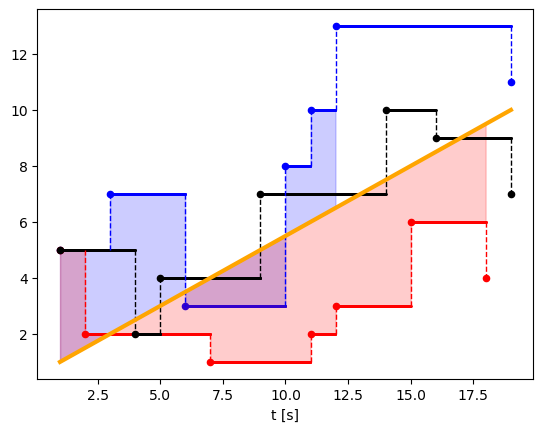

In [60]:
def avgfit(x):
    return 0.5*x+0.5
dt=0.01
x = np.linspace(1,19,int(18/dt))
y = avgfit(x)

x2 = np.linspace(1,18,int(17/dt))
y2 = avgfit(x2)

times1 = np.array([1, 3, 6, 10, 11, 12, 19])
dts1 = np.array([2, 3, 4, 1, 1, 8])
traj1 = np.array([5, 7, 3, 8, 10, 13, 11])

times2 = np.array([1, 2, 7, 11, 12, 15, 18])
dts2 = np.array([1, 5, 4, 1, 3, 3])
traj2 = np.array([5, 2, 1, 2, 3, 6, 4])

times3 = np.array([1, 4, 5, 9, 14, 16, 19])
dts3 = np.array([1, 3, 1, 4, 5, 2, 3])
traj3 = np.array([5, 2, 4, 7, 10, 9, 7])

t1convert, traj1convert = convert_trajectory(dt, times1, dts1, traj1)
t2convert, traj2convert = convert_trajectory(dt, times2, dts2, traj2)
t3convert, traj3convert = convert_trajectory(dt, times3, dts3, traj3)

for i in range(len(times1)-1):
    plt.plot(np.linspace(times1[i+1],times1[i+1],100),np.linspace(traj1[i],traj1[i+1],100),color='blue',linestyle='dashed',linewidth=1)
plt.scatter(times1,traj1,color='blue',s=20)
plt.scatter(x, traj1convert,color='blue',s=1, label='trajectory 1')
plt.fill_between(x,traj1convert,y,color='blue',alpha=0.2,where=x<12)

for j in range(len(times2)-1):
    plt.plot(np.linspace(times2[j+1],times2[j+1],100),np.linspace(traj2[j],traj2[j+1],100),color='red',linestyle='dashed',linewidth=1)
plt.scatter(times2,traj2,color='red',s=20)
plt.scatter(x2, traj2convert,color='red',s=1)
plt.fill_between(x2,traj2convert,y2,color='red',alpha=0.2,where=x2<18)

for k in range(len(times3)-1):
    plt.plot(np.linspace(times3[k+1],times3[k+1],100),np.linspace(traj3[k],traj3[k+1],100),color='black',linestyle='dashed',linewidth=1)
plt.scatter(times3,traj3,color='black',s=20)
plt.scatter(x, traj3convert,color='black',s=1)
#plt.fill_between(x,traj3convert,y,color='black',alpha=0.2,where=x<17)

plt.plot(x,y,color='orange',label='avg',linewidth=3)

plt.xlabel('t [s]')
plt.show()

## Averages

In [61]:
# initialise data for average trajectory
runs=3
runs_time = {'0': times1, '1': times2, '2': times3}
runs_heat = {'0': traj1, '1': traj2, '2': traj3}

avg_heat = []
time = []
step = np.full(runs,0)

# find length of the trajectory with the shortest number of steps
min_len = [len(runs_time[str(min_l)]) for min_l in range(runs)]

# while the largest step value is less than the length of the shortest trajectory
while np.max(step) < np.min(min_len):
    # find the trajectory at the smallest time
    findmin = [runs_time[str(key)][s] for key, s in zip(range(runs),step)]   
    mintimes = np.where(findmin==np.min(findmin))[0]
    
    # get the average between the trajectories for that time interval for heat
    getavg_heat = [runs_heat[str(key)][s] for key, s in zip(range(runs),step)]
        
    # append averages and corresponding time
    avg_heat.append(np.mean(getavg_heat))
    time.append(np.min(findmin))
    
    # update the new step positions
    for mint in mintimes:
        step[mint] += 1
    #print(np.max(step))

In [83]:
dtsavg = []
for z in range(len(time)-1):
    dtsavg.append(time[z+1]-time[z])

Text(0.5, 0, 't [s]')

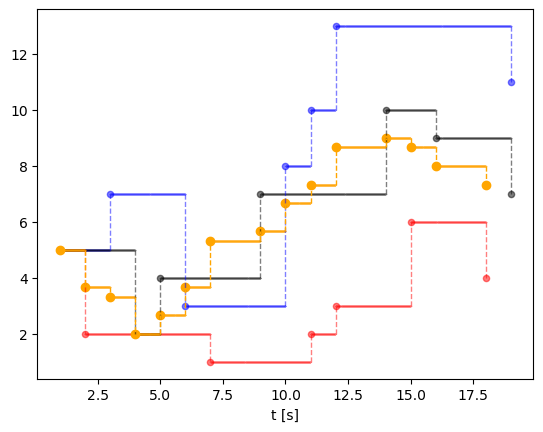

In [93]:
for i in range(len(times1)-1):
    plt.plot(np.linspace(times1[i+1],times1[i+1],100),np.linspace(traj1[i],traj1[i+1],100),color='blue',linestyle='dashed',linewidth=1,alpha=0.5)
plt.scatter(times1,traj1,color='blue',s=20,alpha=0.5)
plt.scatter(x, traj1convert,color='blue',s=0.03,alpha=0.5)

for j in range(len(times2)-1):
    plt.plot(np.linspace(times2[j+1],times2[j+1],100),np.linspace(traj2[j],traj2[j+1],100),color='red',linestyle='dashed',linewidth=1,alpha=0.5)
plt.scatter(times2,traj2,color='red',s=20,alpha=0.5)
plt.scatter(x2, traj2convert,color='red',s=0.03,alpha=0.5)

for k in range(len(times3)-1):
    plt.plot(np.linspace(times3[k+1],times3[k+1],100),np.linspace(traj3[k],traj3[k+1],100),color='black',linestyle='dashed',linewidth=1,alpha=0.5)
plt.scatter(times3,traj3,color='black',s=20,alpha=0.5)
plt.scatter(x, traj3convert,color='black',s=0.03,alpha=0.5)

plt.scatter(time, avg_heat,color='orange')

avgtime_convert, avgheat_convert = convert_trajectory(dt, time, dtsavg, avg_heat)

for n in range(len(avg_heat)-1):
    plt.plot(np.linspace(time[n+1],time[n+1],100),np.linspace(avg_heat[n],avg_heat[n+1],100),color='orange',linestyle='dashed',linewidth=1)
plt.scatter(avgtime_convert, avgheat_convert, color='orange', s=0.03)
slope_heat, intercept_heat = np.polyfit(time, avg_heat, 1)
avg_heat_new = [slope_heat * i + intercept_heat for i in time]
#plt.plot(time, avg_heat_new,color='orange')

plt.xlabel('t [s]')

In [140]:
#print(x,x2, avgtime_convert)
print(len(newtraj1), len(avgheat_convert))

#numpy.float64

print(len(avgtime_convert))

1700 1700
1700


Text(0.5, 0, 't [s]')

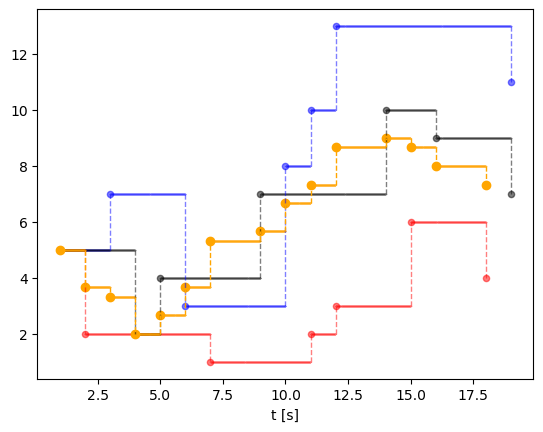

In [141]:
for i in range(len(times1)-1):
    plt.plot(np.linspace(times1[i+1],times1[i+1],100),np.linspace(traj1[i],traj1[i+1],100),color='blue',linestyle='dashed',linewidth=1,alpha=0.5)
plt.scatter(times1,traj1,color='blue',s=20,alpha=0.5)
plt.scatter(x, traj1convert,color='blue',s=0.03,alpha=0.5)

for j in range(len(times2)-1):
    plt.plot(np.linspace(times2[j+1],times2[j+1],100),np.linspace(traj2[j],traj2[j+1],100),color='red',linestyle='dashed',linewidth=1,alpha=0.5)
plt.scatter(times2,traj2,color='red',s=20,alpha=0.5)
plt.scatter(x2, traj2convert,color='red',s=0.03,alpha=0.5)

for k in range(len(times3)-1):
    plt.plot(np.linspace(times3[k+1],times3[k+1],100),np.linspace(traj3[k],traj3[k+1],100),color='black',linestyle='dashed',linewidth=1,alpha=0.5)
plt.scatter(times3,traj3,color='black',s=20,alpha=0.5)
plt.scatter(x, traj3convert,color='black',s=0.03,alpha=0.5)

plt.scatter(time, avg_heat,color='orange')

avgtime_convert, avgheat_convert = convert_trajectory(dt, time, dtsavg, avg_heat)

for n in range(len(avg_heat)-1):
    plt.plot(np.linspace(time[n+1],time[n+1],100),np.linspace(avg_heat[n],avg_heat[n+1],100),color='orange',linestyle='dashed',linewidth=1)
plt.scatter(avgtime_convert, avgheat_convert, color='orange', s=0.03)
slope_heat, intercept_heat = np.polyfit(time, avg_heat, 1)
avg_heat_new = [slope_heat * i + intercept_heat for i in time]
#plt.plot(time, avg_heat_new,color='orange')

plt.xlabel('t [s]')

newx = x[0:len(avgheat_convert)]
newx2 = x2[0:len(avgheat_convert)]
newtraj1 = traj1convert[0:len(avgheat_convert)]
for indexi in range(len(newtraj1)):
    newtraj1[indexi] = np.float64(newtraj1[indexi])
print(type(avgtime_convert[0]))
    
#newtraj2 = traj2convert[0:len(avgheat_convert)]
#newtraj3 = traj3convert[0:len(avgheat_convert)]
plt.fill_between(avgtime_convert,newtraj1,avgheat_convert,color='blue',alpha=0.2,where=newtraj1>avgheat_convert)
#plt.fill_between(avgtime_convert,newtraj2,avgheat_convert,color='red',alpha=0.2,where=newtraj2>avgheat_convert)
#plt.fill_between(avgtime_convert,newtraj3,avgheat_convert,color='black',alpha=0.2,where=newtraj3>avgheat_convert)


## Plots for K-S Test

In [1]:
def cdf(T):
    return (2 / np.pi) * np.arcsin(np.sqrt(T))

In [4]:
t1_heat = np.array([6.75877202e-01, 8.79773209e-01, 3.82436189e-01, 9.77803647e-01,
       3.70998255e-02, 9.20326153e-01, 2.79167583e-02, 9.88548393e-01,
       8.21779175e-01, 1.24084181e-03, 2.57908243e-01, 2.93082902e-01,
       9.80110098e-01, 3.44023397e-01, 2.34417015e-01, 8.69130568e-01,
       9.55949362e-01, 7.20898430e-01, 6.03564954e-01, 9.95131470e-01,
       2.78159320e-01, 1.73567853e-01, 1.29030860e-01, 6.48088841e-01,
       2.38239872e-01, 8.68182251e-01, 9.90105733e-01, 1.65440907e-01,
       1.91976111e-01, 7.35163637e-03, 5.32062044e-01, 8.96112477e-01,
       6.19038186e-01, 1.01034141e-01, 6.28406596e-02, 7.87750846e-01,
       7.91885443e-01, 4.99696295e-01, 2.63812903e-01, 9.83497986e-04,
       4.93425080e-01, 1.71429514e-02, 8.63575687e-01, 8.65006144e-01,
       3.37190440e-01, 5.45774328e-01, 1.06995662e-03, 9.65562224e-01,
       5.35886298e-01, 1.68069324e-01, 8.40683874e-01, 1.35920818e-01,
       1.34191798e-02, 9.78856024e-01, 6.61380112e-03, 9.16878690e-01,
       5.42761688e-01, 1.81791643e-01, 8.05933924e-01, 6.97769238e-01,
       3.53109210e-02, 8.17336431e-01, 1.15118626e-01, 3.55255637e-02,
       9.98693512e-01, 1.18962909e-01, 2.99553673e-01, 3.43122991e-01,
       9.94492614e-01, 9.92562267e-01, 7.42158524e-02, 4.03810074e-01,
       5.99397123e-01, 7.51847038e-02, 8.28451912e-04, 5.76131803e-01,
       9.99041707e-01, 8.83825558e-01, 8.71555888e-04, 9.99178687e-01,
       5.58003783e-01, 6.76842000e-01, 6.26879310e-01, 1.71770130e-01,
       3.02136303e-01, 4.93204586e-02, 5.68090531e-01, 6.13020987e-01,
       2.41793703e-01, 3.99165752e-01, 9.62815756e-01, 5.79934473e-01,
       9.99951359e-01, 9.89069030e-01, 7.63412007e-01, 9.31702852e-01,
       9.94597314e-01, 5.96734042e-02, 9.58214416e-01, 4.61396596e-03])

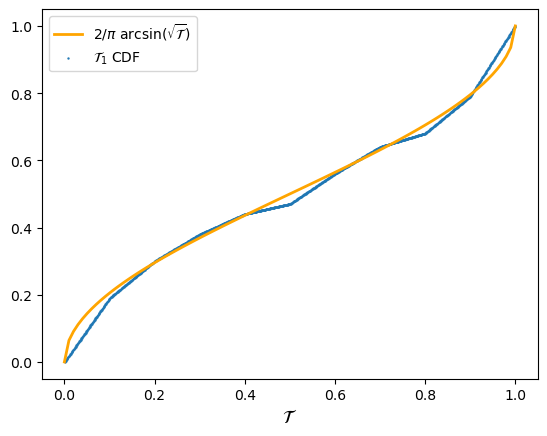

In [17]:
import numpy as np
from scipy.stats import rv_histogram

def compute_cdf_scipy(data, num_bins=10):
    """
    Compute the empirical cumulative distribution function (CDF) using scipy's rv_histogram.
    
    Parameters:
    - data: NumPy array of observations.
    - num_bins: Number of bins to use for the histogram (default is 10).
    
    Returns:
    - x_vals: The sorted array of observations (bin centers).
    - cdf_vals: The corresponding CDF values.
    """
    # Create a histogram and normalize it to get a probability distribution
    hist, bin_edges = np.histogram(data, bins=num_bins, density=True)
    
    # Create a scipy rv_histogram object
    hist_dist = rv_histogram((hist, bin_edges))
    
    # Compute the CDF using the fitted histogram distribution
    x_vals = np.linspace(np.min(data), np.max(data), 1000)
    cdf_vals = hist_dist.cdf(x_vals)
    
    return x_vals, cdf_vals

# Example usage:
#data = np.random.rand(100)  # Replace with your actual data
x_vals, cdf_vals = compute_cdf_scipy(t1_heat)

# Optionally, visualize the CDF
import matplotlib.pyplot as plt
plt.plot(np.linspace(0,1,100),cdf(np.linspace(0,1,100)),color='orange',label='$2/\pi$ $\\arcsin(\sqrt{\mathcal{T}})$',linewidth=2)
plt.scatter(x_vals, cdf_vals,s=0.5,label='$\mathcal{T}_1$ CDF')
plt.xlabel('$\mathcal{T}$',fontsize=13)
plt.legend()
plt.show()
